In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Logbook 4: Danny Phan (21001091)

## Klemperer Rosettes (08/03/2023)

A Klemperer Rosette is a peculiar gravitational system of an even number of alternating heavier and lighter moons where all the light moons and all the heavy moons have the same set mass. All of these moons orbit around a common central planet.

When these moons are placed at the corners of regular polygons, interesting orbits arise.

The orbits I want to look at is described in [Klemperer's original article](https://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1962AJ.....67..162K&defaultprint=YES&filetype=.pdf), for this logbook, I will try and replicate the simplest of these, the Rhombic Configuration.

For the Rhombic configuration, we have the following equation of motion

$$
G \left[\frac{m_1}{(2r_1)^2} + \frac{2m_2r_1}{(r_1^2+r_2^2)^\frac{3}{2}} \right] = \Omega^2 r_1
$$


Where G is the gravitational constant, r is the distance of each planet to the center, $m_0$ is the mass of the sun.

I want to simulate rhombic, hexagonal, and octagonal rosettes, so I will make a logbook for each one of these. This logbook will be on the Rhombic configuration of the Klemperer Rosettes.

For the rhombus, the mass ratio $\mu = m_2 / m_1$ and the radius ratio $\rho = r_2/r_1$ have the following relation

$$
\mu = \frac{8-(1+\rho^2)^\frac{3}{2} [1+4\mu_0(1-1/\rho^3)]}{8-(1+1/\rho^2)^\frac{3}{2}}
$$

where $\mu_0 = m_0/m_1$ where $m_0$ is the mass of the planet.


The moons are distributed on a $60^\circ$, $120^\circ$ rhombus whose short diagonal is equal to its sidelength, the smaller masses are at the furthest distance.

## No progress (08/03/2023)

A few hours later... and my orbits still don't work. I'm certain it's because my initial velocities and positions aren't correct but the paper written on this subject is unhelpful in providing values beyond the mass and radius ratios.

I might reattempt this using the Runge-Kutta 4 method, since I have equations of motion to describe these objects.

I will leave my code here for now as a record of this attempt. I may or may not come back to this later. 

In [10]:
# Parameters

m0 = 1000
m1 = 0.01
m2 = 2.0
m3 = 0.01

N = 120000

R0 = np.zeros((N, 2))
R1 = np.zeros((N, 2))
R2 = np.zeros((N, 2))
R3 = np.zeros((N, 2))

V0 = np.zeros((N, 2))
V1 = np.zeros((N, 2))
V2 = np.zeros((N, 2))
V3 = np.zeros((N, 2))

R0[0] = np.array([0,0])
V0[0] = np.array([0,0])

R1[0] = np.array([5,8.66])
V1[0] = np.array([-8.66,5])

R2[0] = np.array([10,0])
V2[0] = np.array([0,10])

R3[0] = np.array([5,-8.66])
V3[0] = np.array([8.66,5])

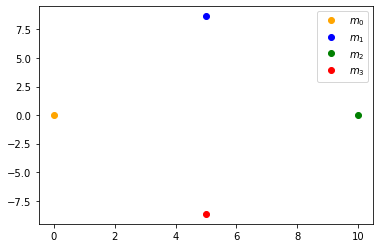

In [11]:
plt.plot(R0[0,0], R0[0,1], 'bo', label = r"$m_0$", color = "orange")
plt.plot(R1[0,0], R1[0,1], 'bo', label = r"$m_1$", color = "blue")
plt.plot(R2[0,0], R2[0,1], 'bo', label = r"$m_2$", color = "green")
plt.plot(R3[0,0], R3[0,1], 'bo', label = r"$m_3$", color = "red")

plt.legend()

In [12]:
def force(m1, m2, r1, r2):
    """
    Returns the force acting on m1 due to m2
    inputs:
    m1    mass of body 1
    m2    mass of body 2
    r1    radius of body 1
    r2    radius of body 2
    outputs:
    f     the force acting on m1 due to m2  
    """
   
    r_12 = r2 - r1
   
    r_12_mag = np.linalg.norm(r_12) ** 3
    
    f = (m1 * m2 * r_12) / r_12_mag
    return f

In [14]:
%%time

dt = 1e-4

for i in range(N - 1):
    f1 =  force(m1, m0, R1[i], R0[i]) + force(m1, m2, R1[i], R2[i]) + force(m1, m3, R1[i], R3[i]) 
    f2 =  force(m2, m0, R2[i], R0[i]) + force(m2, m1, R2[i], R1[i]) + force(m2, m3, R2[i], R3[i]) 
    f3 =  force(m3, m0, R3[i], R0[i]) + force(m3, m2, R3[i], R2[i]) + force(m3, m1, R3[i], R1[i]) 
      
    F1 =  force(m1, m0, R1[i+1], R0[i+1]) + force(m1, m2, R1[i+1], R2[i+1]) + force(m1, m3, R1[i+1], R3[i+1]) 
    F2 =  force(m2, m0, R2[i+1], R0[i+1]) + force(m2, m1, R2[i+1], R1[i+1]) + force(m2, m3, R2[i+1], R3[i+1]) 
    F3 =  force(m3, m0, R3[i+1], R0[i+1]) + force(m3, m2, R3[i+1], R2[i+1]) + force(m3, m1, R3[i+1], R1[i+1])   
    
    R1[i+1] = R1[i] + dt * V1[i] + dt**2 * f1/(2*m1)    
    R2[i+1] = R2[i] + dt * V2[i] + dt**2 * f2/(2*m2)
    R3[i+1] = R3[i] + dt * V3[i] + dt**2 * f3/(2*m3)
    
    V1[i+1] = V1[i] + dt * (f1+F1) / (2*m1)
    V2[i+1] = V2[i] + dt * (f2+F2) / (2*m2)
    V3[i+1] = V3[i] + dt * (f3+F3) / (2*m3)
   

<ipython-input-12-b8966d7a8e06>:17: RuntimeWarning: invalid value encountered in true_divide
  f = (m1 * m2 * r_12) / r_12_mag


Wall time: 29.2 s


I keep getting this error! My initial conditions must be wrong!

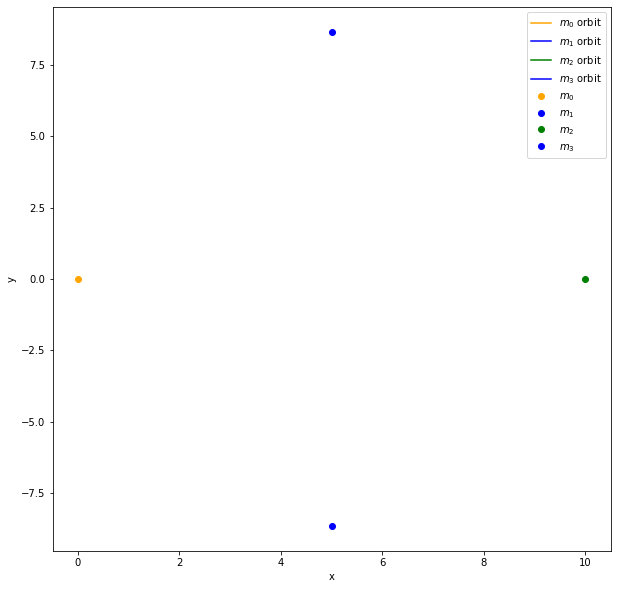

In [16]:
plt.figure(figsize = (10,10))

plt.plot(R0[:,0], R0[:,1], label = r"$m_0$ orbit", color = "orange")
plt.plot(R1[:,0], R1[:,1], label = r"$m_1$ orbit", color = "blue")
plt.plot(R2[:,0], R2[:,1], label = r"$m_2$ orbit", color = "green")
plt.plot(R3[:,0], R3[:,1], label = r"$m_3$ orbit", color = "blue")


plt.plot(R0[0,0], R0[0,1], 'bo', label = r"$m_0$", color = "orange")
plt.plot(R1[0,0], R1[0,1], 'bo', label = r"$m_1$", color = "blue")
plt.plot(R2[0,0], R2[0,1], 'bo', label = r"$m_2$", color = "green")
plt.plot(R3[0,0], R3[0,1], 'bo', label = r"$m_3$", color = "blue")

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'upper right')
 